In [3]:
import pandas as pd
import seaborn as sns
data=pd.read_csv('movie.csv',delimiter=',')
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [4]:
newdata=data.iloc[:,4:6]
newdata.head()

,director_facebook_likes,actor_3_facebook_likes
0,0.0,855.0
1,563.0,1000.0
2,0.0,161.0
3,22000.0,23000.0
4,131.0,NaN


In [19]:
newdata.isnull().sum()
newdata.dropna(inplace=True)

In [20]:
from sklearn.cluster import KMeans
cls = KMeans(n_clusters=5)
cls.fit(newdata)

C:\Users\Mahendra Reddy\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [21]:
cls.cluster_centers_

array([[12490.38461538,   605.93269231],
       [  153.94452806,   424.19264674],
       [  210.77011494, 11126.43678161],
       [17545.45454545, 14545.45454545],
       [17621.21212121,   596.10606061]])

In [23]:
cls.labels_
len(cls.labels_)

4919

In [28]:
import numpy as np
uni,count=np.unique(cls.labels_,return_counts=True)
print(dict(zip(uni,count)))

{0: 104, 1: 4651, 2: 87, 3: 11, 4: 66}


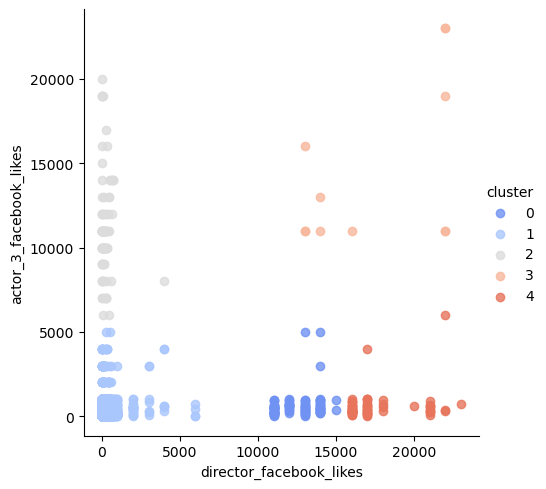

In [39]:
newdata['cluster']=cls.labels_
sns.lmplot(x='director_facebook_likes',y='actor_3_facebook_likes',data=newdata,hue='cluster',palette='coolwarm',fit_reg=False)

In [30]:
newdata.head()

,director_facebook_likes,actor_3_facebook_likes,cluster
0,0.0,855.0,1
1,563.0,1000.0,1
2,0.0,161.0,1
3,22000.0,23000.0,3
5,475.0,530.0,1
